In [1]:
%pip install seaborn

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Reading prepared (US home prices) data into a dataframe.

In [3]:
us_house_price_df = pd.read_csv("Us-Homedataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
2004-01-01,141.646,2004,1,52179.00000,187687969.2,3.8,186.3,5.7,71.278805,150.0,1.00,79.8,112000,65760,27.201,12.3
2004-02-01,143.192,2004,2,52275.66667,187875451.4,3.7,186.7,5.6,71.209732,153.4,1.01,79.8,112000,65760,27.201,12.3
2004-03-01,145.059,2004,3,52372.33333,188057722.0,3.6,187.1,5.8,71.049780,156.5,1.00,79.8,112000,65760,27.201,12.3
2004-04-01,146.593,2004,4,52469.00000,188320169.7,4.0,187.4,5.6,71.181759,160.1,1.00,79.8,112000,65760,27.201,12.3
2004-05-01,148.186,2004,5,52591.00000,188475810.3,3.8,188.2,5.6,71.132043,162.7,1.00,79.8,112000,65760,27.201,12.3


In [4]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

In [5]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
count,246.000000,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,192.428433,58403.968835,2.014196e+08,6.390244,237.912220,5.845122,69.592910,224.764508,1.589959,81.497561,122573.756098,69487.804878,36.080512,14.380488
std,51.492085,4445.106471,5.683791e+06,1.927880,31.757409,2.096809,2.098784,51.226185,1.851116,1.093540,6120.658491,4689.099742,6.523122,1.714746
min,136.533000,52179.000000,1.876880e+08,3.300000,186.300000,3.400000,60.195798,150.000000,0.050000,79.800000,112000.000000,63350.000000,27.201000,12.300000
25%,153.759000,54845.749998,1.973358e+08,5.000000,215.267250,4.300000,67.725150,190.450000,0.120000,80.600000,117181.000000,65760.000000,32.669000,12.900000
50%,177.838500,56864.166665,2.027626e+08,5.750000,235.444500,5.100000,70.163837,211.500000,0.595000,81.500000,123229.000000,68410.000000,34.230000,14.100000
75%,207.980000,61776.500000,2.058177e+08,7.700000,255.198000,7.275000,71.433240,236.300000,2.407500,82.500000,128451.000000,74580.000000,40.185000,15.800000
max,323.786723,68070.000000,2.091177e+08,12.200000,313.225000,14.700000,72.325549,353.015000,5.330000,83.200000,131434.000000,78250.000000,48.021000,17.600000


In [6]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
CSUSHPISA,1.000000,0.924379,0.606363,0.203224,0.871955,-0.567082,0.467043,0.922859,0.434069,0.793737,0.747766,0.802319,0.865508,0.871872
Per_Capita_GDP,0.924379,1.000000,0.826151,0.056258,0.952702,-0.558324,0.326696,0.928901,0.227645,0.941402,0.922064,0.859134,0.934929,0.968783
working_age_pop,0.606363,0.826151,1.000000,0.024770,0.891078,-0.217948,-0.127704,0.767697,-0.165914,0.942985,0.966239,0.648254,0.861140,0.881632
Houses,0.203224,0.056258,0.024770,1.000000,0.143682,-0.010553,0.194634,0.211947,0.319714,-0.009827,-0.025976,-0.022341,0.095329,0.004288
CPI,0.871955,0.952702,0.891078,0.143682,1.000000,-0.357562,0.121945,0.958535,0.103900,0.958820,0.945646,0.730357,0.967700,0.972896
UNRATE,-0.567082,-0.558324,-0.217948,-0.010553,-0.357562,1.000000,-0.895890,-0.390854,-0.567507,-0.338185,-0.343624,-0.547954,-0.284385,-0.393546
EmpRate,0.467043,0.326696,-0.127704,0.194634,0.121945,-0.895890,1.000000,0.211733,0.759322,0.038152,0.017055,0.381737,0.063730,0.137600
Cons_Material,0.922859,0.928901,0.767697,0.211947,0.958535,-0.390854,0.211733,1.000000,0.150252,0.888293,0.859250,0.699766,0.940777,0.928597
FEDFUNDS,0.434069,0.227645,-0.165914,0.319714,0.103900,-0.567507,0.759322,0.150252,1.000000,-0.051209,-0.078330,0.234142,0.026080,0.054251
urban_pop_us,0.793737,0.941402,0.942985,-0.009827,0.958820,-0.338185,0.038152,0.888293,-0.051209,1.000000,0.993092,0.808096,0.964370,0.984977


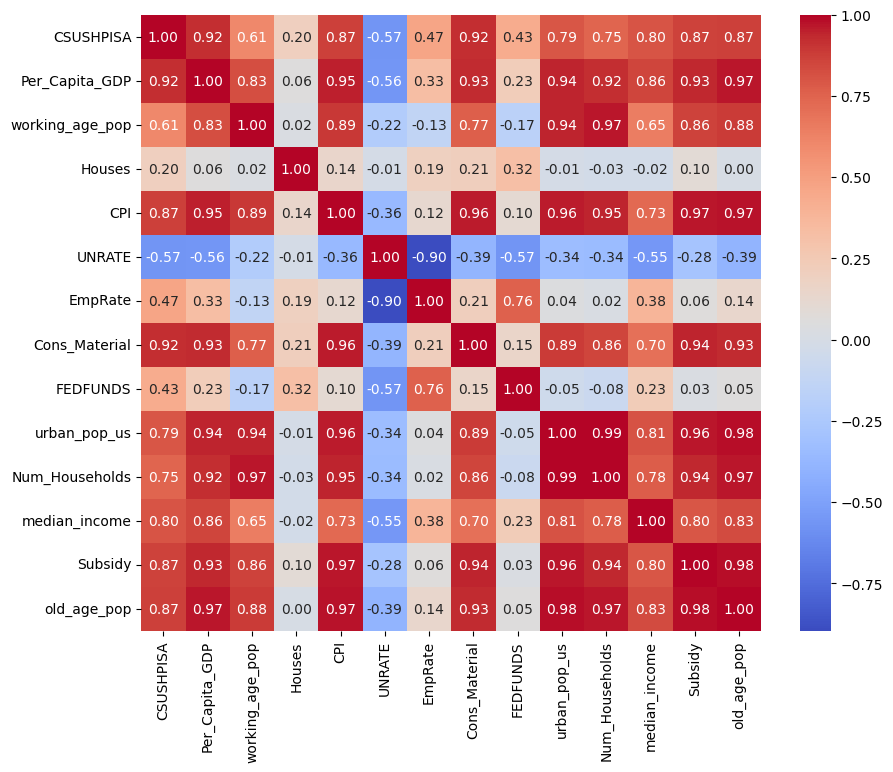

In [7]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

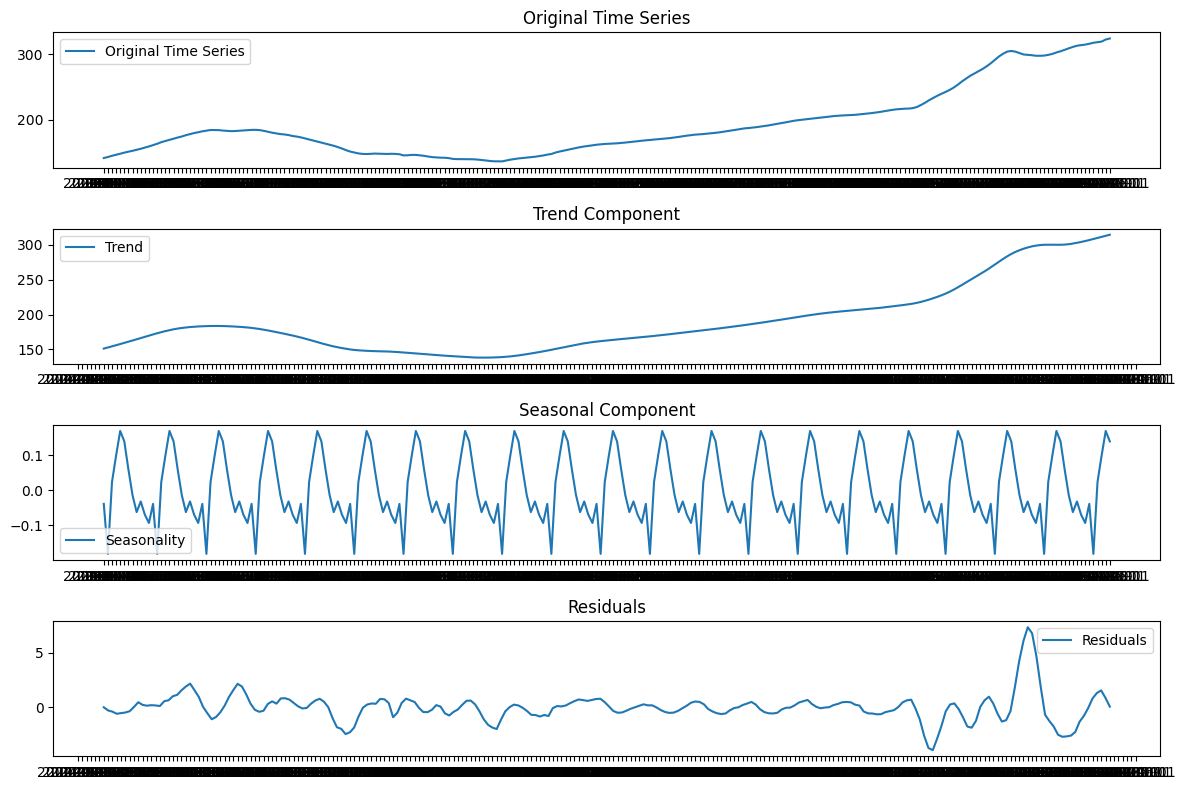

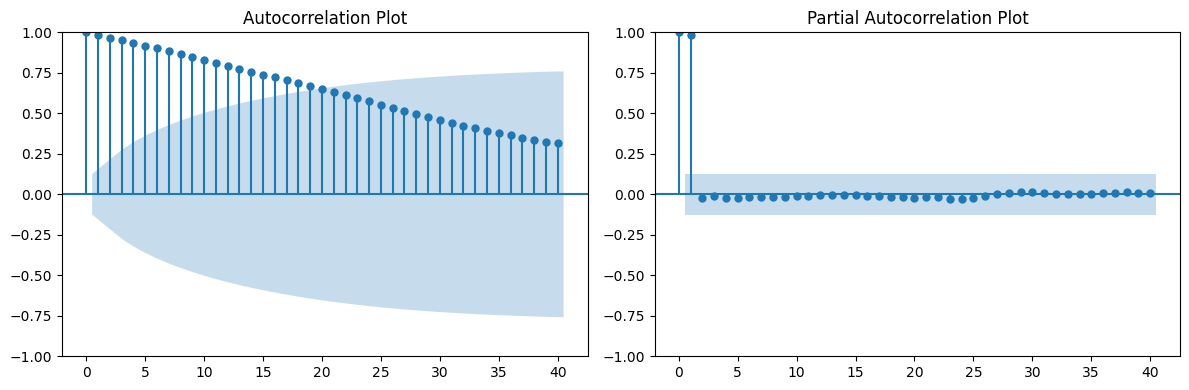

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(us_house_price_df)

In [ ]:
us_house_price_df.columns

In [24]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

<Figure size 1300x800 with 0 Axes>

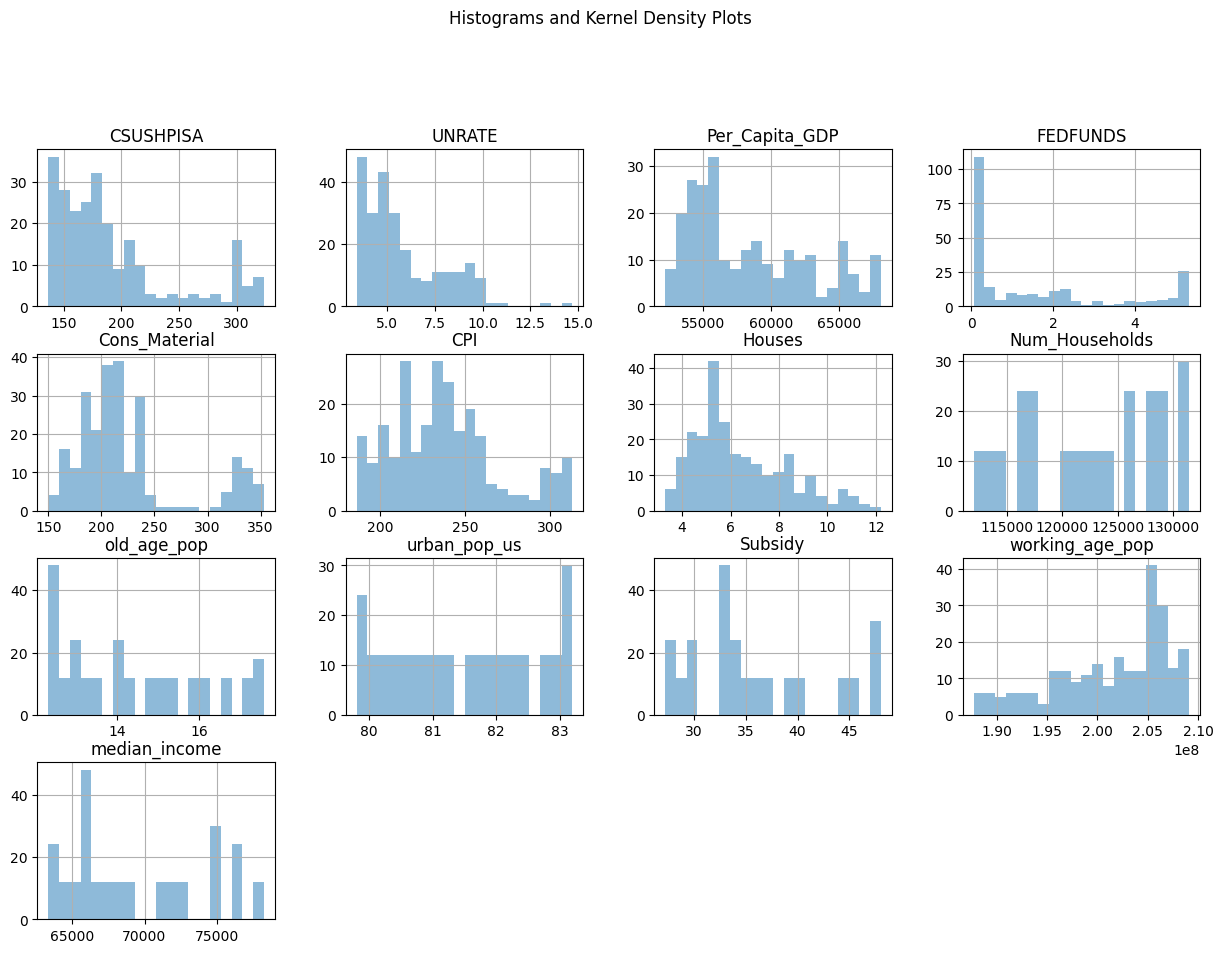

In [25]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [26]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

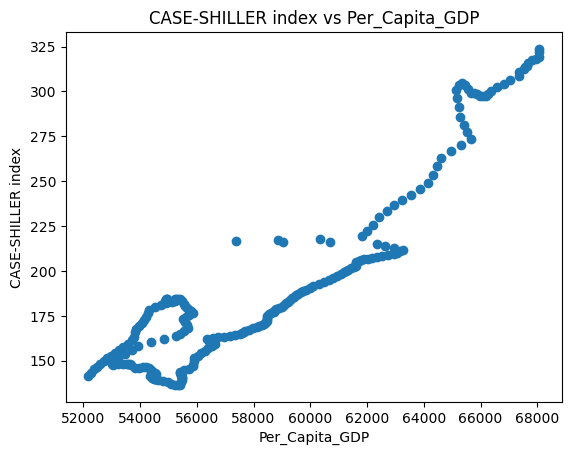

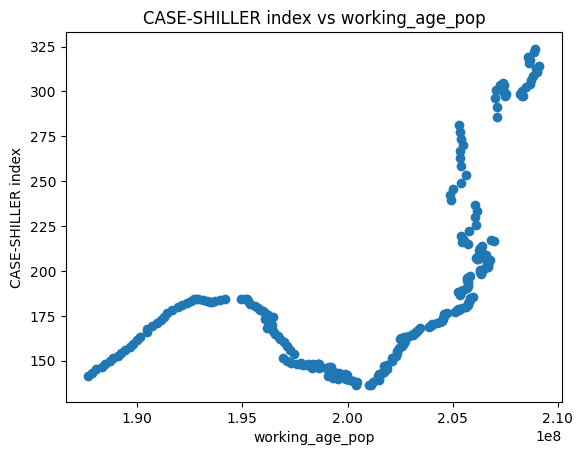

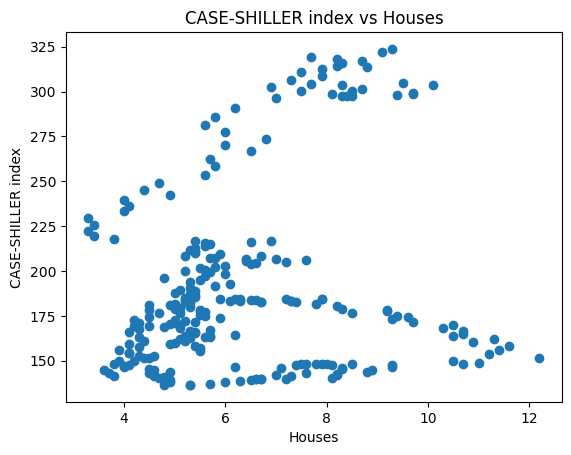

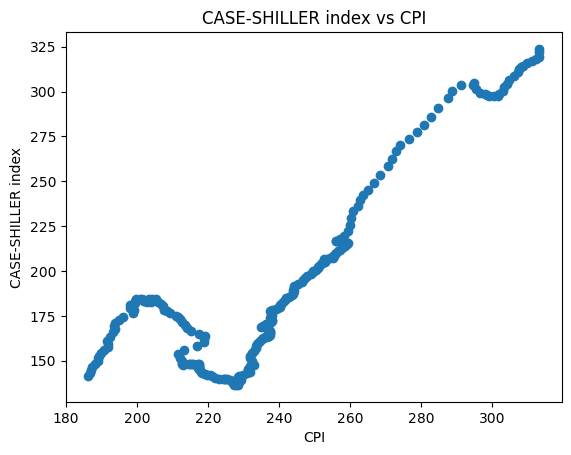

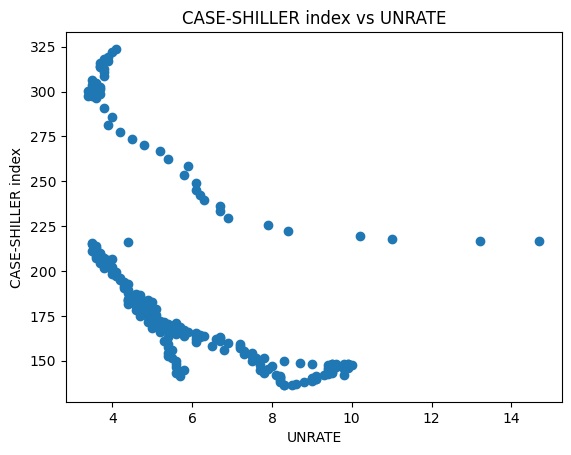

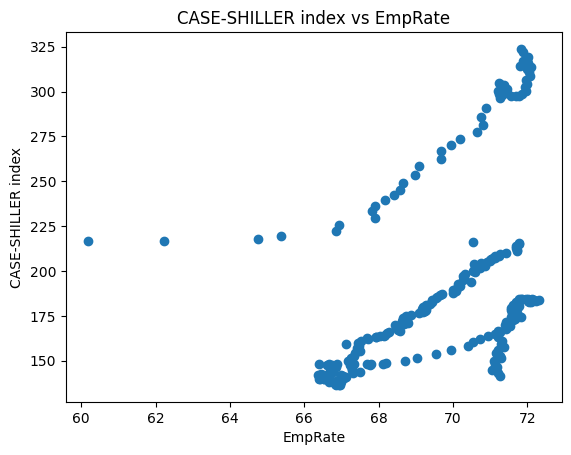

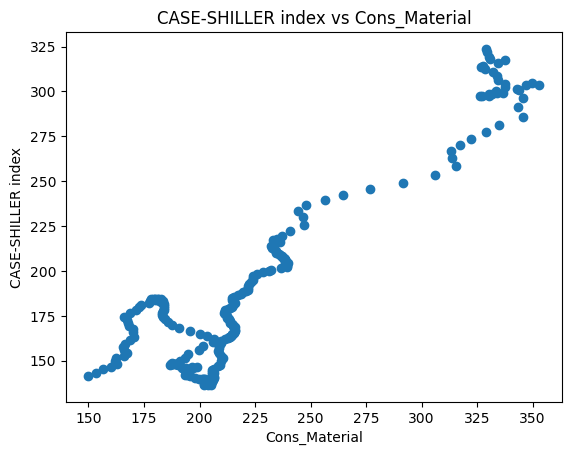

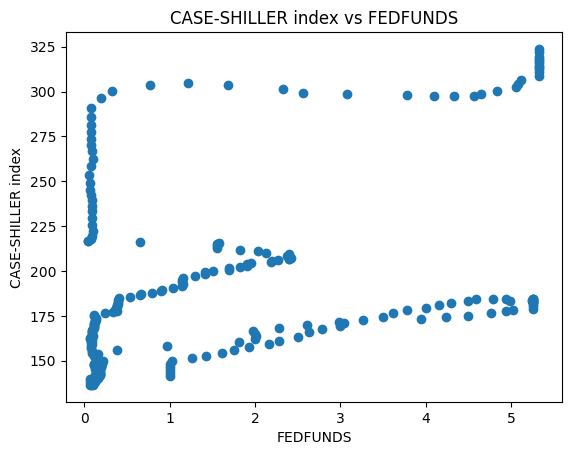

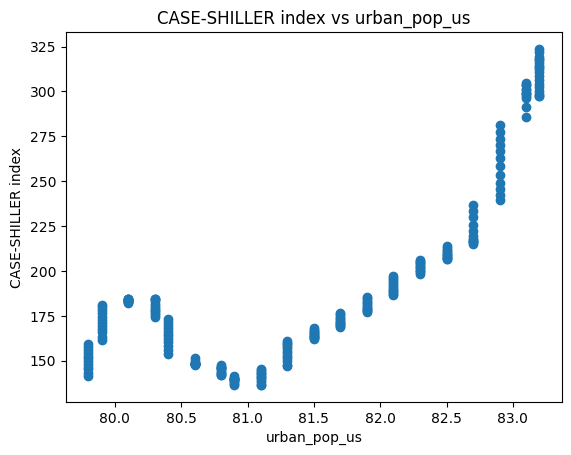

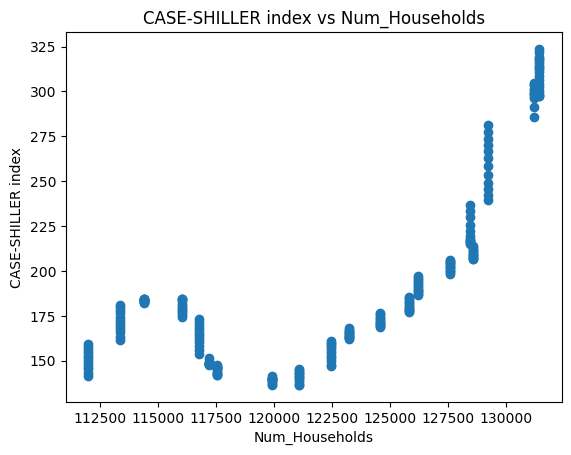

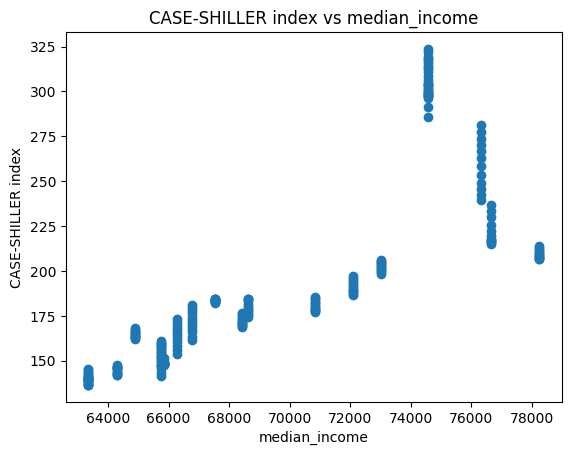

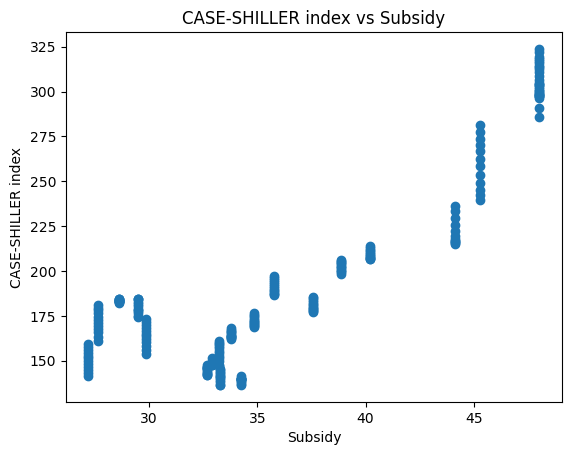

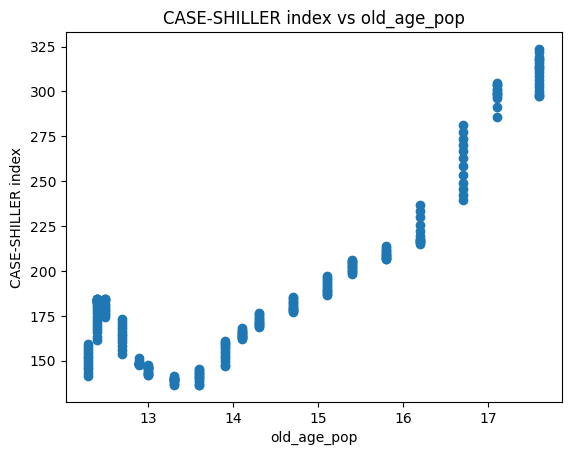

In [27]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [28]:
#Calculate correlation coefficients
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Houses             0.203224
FEDFUNDS           0.434069
EmpRate            0.467043
UNRATE             0.567082
working_age_pop    0.606363
Num_Households     0.747766
urban_pop_us       0.793737
median_income      0.802319
Subsidy            0.865508
old_age_pop        0.871872
CPI                0.871955
Cons_Material      0.922859
Per_Capita_GDP     0.924379
dtype: float64


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [30]:
print(us_house_price_df.columns)
mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

Index(['Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI', 'UNRATE',
       'EmpRate', 'Cons_Material', 'FEDFUNDS', 'urban_pop_us',
       'Num_Households', 'median_income', 'Subsidy', 'old_age_pop'],
      dtype='object')


In [31]:
X

,Per_Capita_GDP,CPI,Cons_Material,median_income,Subsidy,old_age_pop
DATE,,,,,,
2004-01-01,52179.00000,186.300,150.000,65760,27.201,12.3
2004-02-01,52275.66667,186.700,153.400,65760,27.201,12.3
2004-03-01,52372.33333,187.100,156.500,65760,27.201,12.3
2004-04-01,52469.00000,187.400,160.100,65760,27.201,12.3
2004-05-01,52591.00000,188.200,162.700,65760,27.201,12.3
...,...,...,...,...,...,...
2024-02-01,67804.66667,311.054,337.766,74580,48.021,17.6
2024-03-01,67937.33333,312.230,330.965,74580,48.021,17.6
2024-04-01,68070.00000,313.207,330.166,74580,48.021,17.6


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 245.8997339298333
R-squared: 0.9273470892043212
Coefficients:
Per_Capita_GDP: 22.886370022009167
CPI: -4.426901194042664
Cons_Material: 48.30406748941699
median_income: 20.402334429637918
Subsidy: -3.784321561140689
old_age_pop: -33.238700843153985
Intercept: 189.3057434872449

Model: ElasticNet
Mean Squared Error: 520.913950110739
R-squared: 0.8460920874342247
Coefficients:
Per_Capita_GDP: 9.118586183646071
CPI: 5.268965236653409
Cons_Material: 11.439392393756346
median_income: 8.417812026104833
Subsidy: 4.4824461569359775
old_age_pop: 4.1188545431642964
Intercept: 189.30574348724494

Model: Random Forest
Mean Squared Error: 3.7266781810386265
R-squared: 0.9988989251304824
Feature Importance Analysis:
Per_Capita_GDP: 0.03350347802826301
CPI: 0.3035618571295375
Cons_Material: 0.4770210789398278
median_income: 0.13957633609670245
Subsidy: 0.03784343262878308
old_age_pop: 0.00849381717688615

Model: Gradient Boosting
Mean Squared Error: 4.6096

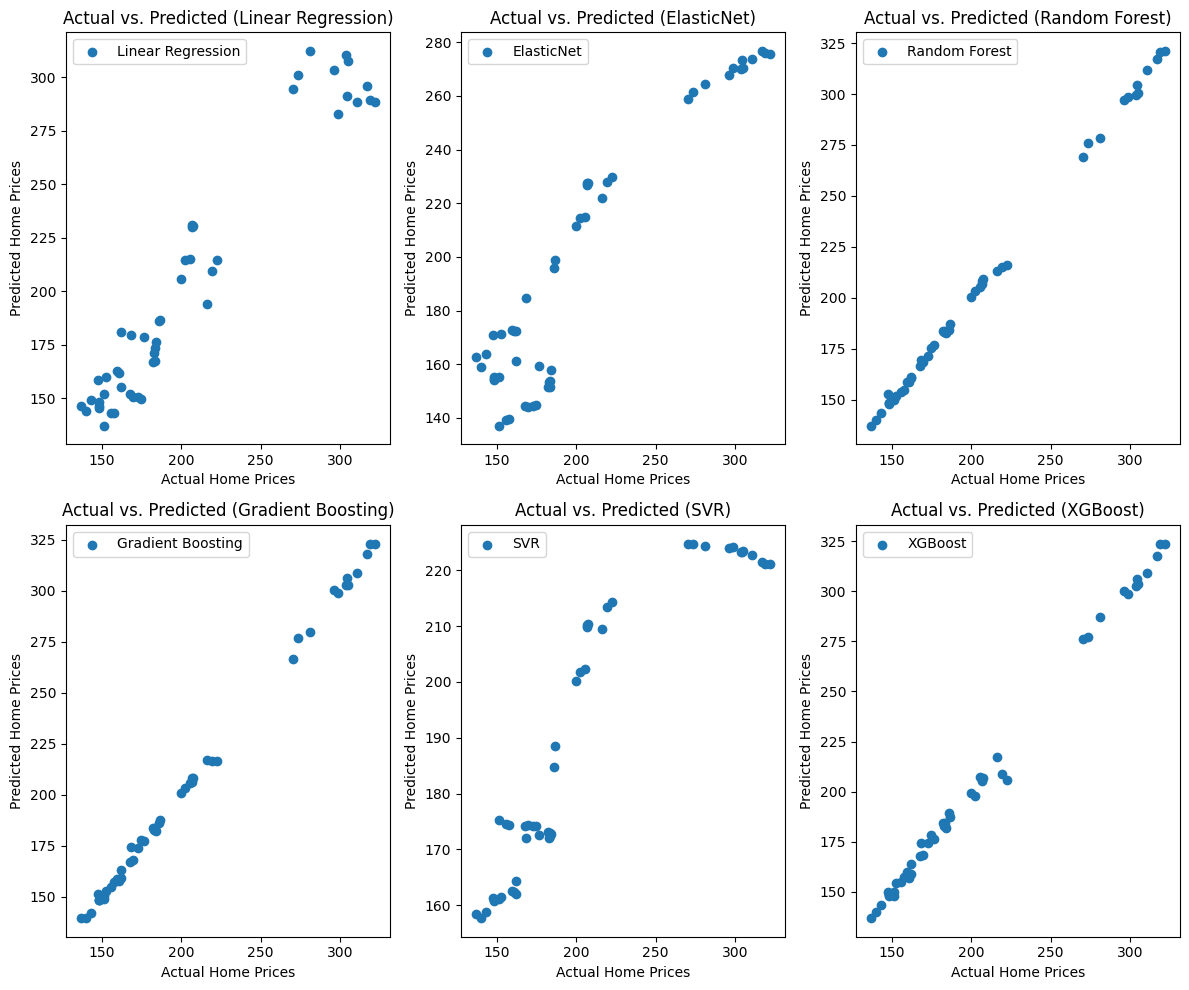


Best Model: RandomForestRegressor with MSE: 3.7266781810386265


In [39]:
df = pd.read_csv('Us-Homedataset.csv')
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

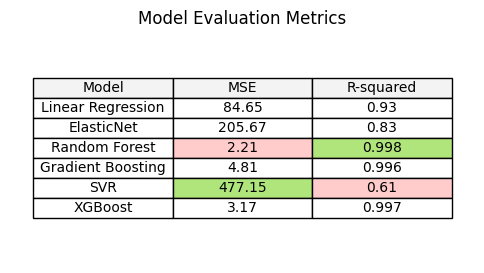

In [40]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()